In [1]:
# Exercise 1: Linear regression with multiple variables

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Part 1: Feature Normalization

print('Loading data ...')

# Load Data
data = np.loadtxt('../ex1/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = len(y)

# Print out some data points
np.set_printoptions(precision=2, suppress=True)
print('First 5 examples from the dataset: ')
print('X = \n{},\n\ny = \n{}'.format(X[:5], y[:5]))

Loading data ...
First 5 examples from the dataset: 
X = 
[[2104.    3.]
 [1600.    3.]
 [2400.    3.]
 [1416.    2.]
 [3000.    4.]],

y = 
[399900. 329900. 369000. 232000. 539900.]


In [3]:
def featureNormalize(X):
    X_norm = X
    
    mu = np.mean(X, axis=0)
    X_norm -= mu
    
    sigma = np.std(X, axis=0, ddof=1)
    X_norm /= sigma
    
    return X_norm, mu, sigma

In [4]:
# Scale features and set them to zero mean
print('Normalizing Features ...')

X, mu, sigma = featureNormalize(X);

# Add intercept term to X
X = np.c_[np.ones(m), X]

print('First 5 examples from the normalized dataset(X): ')
print('X = \n{}'.format(X[:5]))

Normalizing Features ...
First 5 examples from the normalized dataset(X): 
X = 
[[ 1.    0.13 -0.22]
 [ 1.   -0.5  -0.22]
 [ 1.    0.5  -0.22]
 [ 1.   -0.74 -1.54]
 [ 1.    1.26  1.09]]


In [5]:
def computeCostMulti(X, y, theta):
    m = len(y)
    
    hypothesis = np.dot(X, theta)
    error = hypothesis - y
    
    J = np.dot(error.T, error) / (2 * m)
    
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        error = hypothesis - y
        
        theta_grad = np.dot(X.T, error) / m
        
        theta -= alpha * theta_grad
        J_history[i] = computeCostMulti(X, y, theta)
        
    return theta, J_history

Running gradient descent ...


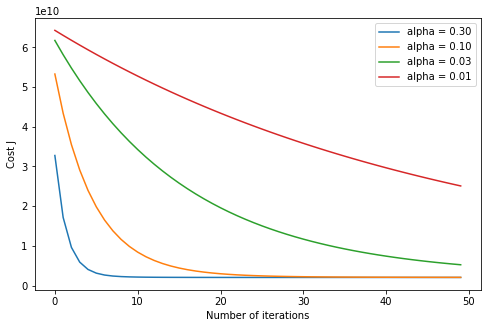

In [6]:
# Part 2: Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alphas = (0.3, 0.1, 0.03, 0.01)
num_iters = 400

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
for alpha in alphas:
    # Init Theta and Run Gradient Descent
    theta = np.zeros(3)
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
    
    # Plot the convergence graph
    ax.plot(J_history[:50], label='alpha = {:.2f}'.format(alpha))
    
ax.legend(loc='upper right')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')
None

In [7]:
# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(theta, '\n')

# Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot(np.array([1, 1650, 3]), theta)
print('Predicted price of a 1650 sq-ft, 3 br house '\
      '(using gradient descent):\n ${:.2f}'.format(price))

Theta computed from gradient descent: 
[334302.06 100087.12   3673.55] 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $165489064.12


In [8]:
def normalEqn(X, y):
    Gramian = np.dot(X.T, X)
    moment = np.dot(X.T, y)
    
    theta = np.dot(np.linalg.pinv(Gramian), moment)
    
    return theta

In [9]:
# Part 3: Normal Equations

print('Solving with normal equations...')

# Load Data
data = np.loadtxt('../ex1/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = len(y)

# Add intercept term to X
X = np.c_[np.ones(m), X]

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: ');
print(theta, '\n');

# Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot(np.array([1, 1650, 3]), theta)
print('Predicted price of a 1650 sq-ft, 3 br house '\
      '(using normal equations):\n ${:.2f}'.format(price))

Solving with normal equations...
Theta computed from the normal equations: 
[89597.91   139.21 -8738.02] 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.46
